<a href="https://colab.research.google.com/github/Akhan1502/MBZUAI-Internship-Tasks/blob/main/Transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#How a transformer works

1. Tokenisation:  The sentence is broken into tokens

In [ ]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("distilgpt2")
tokens = tokenizer.tokenize("A young girl named Alice sits bored by a riverbank...")

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/762 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

2. Embedding - Tokens are transformed into numerical vectors.

In [ ]:
from transformers import AutoModel

model = AutoModel.from_pretrained("distilgpt2")
outputs = tokenizer("A young girl named Alice sits bored by a riverbank...", return_tensors="pt")
model_outputs = model(**outputs)
last_hidden_states = model_outputs.last_hidden_state
print(last_hidden_states)

tensor([[[-7.4774e-02,  3.3527e-01, -3.5023e-02,  ..., -1.7759e-01,
           1.2464e-01, -1.0976e-01],
         [ 2.2184e-01,  1.2856e-01, -5.5049e-01,  ...,  4.1236e-01,
           5.9815e-02,  5.5008e-02],
         [ 3.6546e-01,  9.0658e-01, -2.9144e-01,  ...,  3.1021e-01,
          -1.1596e-01,  8.5160e-02],
         ...,
         [-4.4157e-02,  3.7897e-01, -2.3832e+00,  ...,  3.1218e-01,
          -5.1324e-02, -5.0909e-01],
         [-4.9956e-01, -9.0230e-02, -1.7722e+00,  ...,  1.9919e-01,
           3.5606e-02, -3.4198e-01],
         [-1.9268e-01, -5.1795e-01, -5.6883e-01,  ...,  6.6107e-02,
           1.5629e-03, -2.5094e-01]]], grad_fn=<ViewBackward0>)


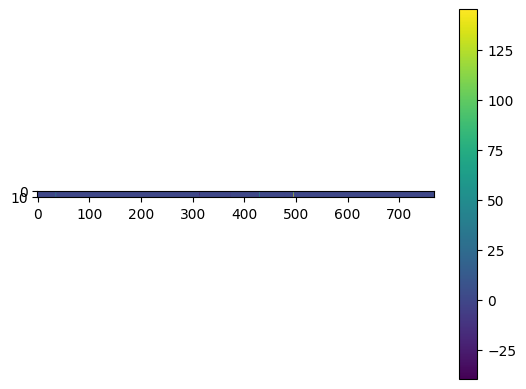

In [ ]:
# Visualization of Embeddings (Simplified Example)
import matplotlib.pyplot as plt
plt.imshow(last_hidden_states.detach().numpy()[0], cmap='viridis')
plt.colorbar()
plt.show()

#TRANSFORMER PIPELINE-Text

This pipeline is for sentiment analysis , the pipeline selects any model that is fine-tuned for sentiment analysis

In [ ]:
from transformers import pipeline

In [ ]:
classifier=pipeline("sentiment-analysis")
classifier(["I love Coding", "I hate long hours in car"])

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


[{'label': 'POSITIVE', 'score': 0.9996923208236694},
 {'label': 'NEGATIVE', 'score': 0.9950567483901978}]

The zero shot classification allows you to classifiy texts based on your own labels

In [ ]:
classifier=pipeline("zero-shot-classification")
classifier("Why did the lady jump out of the window?", candidate_labels=["question", "doubt", "answer"])

No model was supplied, defaulted to facebook/bart-large-mnli and revision d7645e1 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


{'sequence': 'Why did the lady jump out of the window?',
 'labels': ['question', 'doubt', 'answer'],
 'scores': [0.6507592797279358, 0.33804386854171753, 0.011196741834282875]}

for text generation you provide a prompt and the model will auto-complete it by generating the remaining text. This is similar to the predictive text feature that is found on many phones. Text generation involves randomness, so it’s normal if you don’t get the same results as shown below.

In [ ]:
generator=pipeline("text-generation", model="distilgpt2", num_return_sequences=2, max_length=20)
generator("The world war I happened on")

Device set to use cpu
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'The world war I happened on the eve of the start of the war, in the midst of the great war in which Europe had been preparing for a new war.\n\n\nI have found myself in a situation of deep political and military anxiety.\nI am not the only one that has a feeling of guilt, but a sense of guilt.\nI am not the only one that has a feeling of guilt.\nIn this situation I see the world as a whole, and there is a great danger to the world from the world to the world.\nIn this situation I see that there is always a danger to the world that is not only the world but also the world.\nI can feel the need to take a good look at the world and think about the world in a way that is not surprising.\nI can always feel the need to take a good look at the world in a way that is not surprising.\nI can always sense the need to take a good look at the world in a way that is not surprising.\nI can always feel the need to take a good look at the world in a way that is not surprising.\nI c

Using the mask, which is a pretraining objective of BERT , can guess the missing value. The idea of this task is to fill in the blanks in a given text

In [ ]:
unmasker=pipeline("fill-mask")
unmasker("I love cold things like <mask>", top_k=2)


No model was supplied, defaulted to distilbert/distilroberta-base and revision fb53ab8 (https://huggingface.co/distilbert/distilroberta-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/331M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert/distilroberta-base were not used when initializing RobertaForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cpu


[{'score': 0.029574867337942123,
  'token': 42,
  'token_str': ' this',
  'sequence': 'I love cold things like this'},
 {'score': 0.022632325068116188,
  'token': 1958,
  'token_str': ' snow',
  'sequence': 'I love cold things like snow'}]

Named Entity Recognition is another task of the transformers that classifies each word in the sentence. Named entity recognition (NER) is a task where the model has to find which parts of the input text correspond to entities such as persons, locations, or organizations.

In [ ]:
ner=pipeline("ner", grouped_entities=True)
ner("My name is Aqsa and I am 21 years old and I live in Dubai")

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


[{'entity_group': 'PER',
  'score': np.float32(0.9980874),
  'word': 'Aqsa',
  'start': 11,
  'end': 15},
 {'entity_group': 'LOC',
  'score': np.float32(0.9997564),
  'word': 'Dubai',
  'start': 52,
  'end': 57}]

Question Answering by providing context and question

In [ ]:
question_answerer=pipeline("question-answering")
question_answerer(
    question="Where do I live?",
    context="My name is Aqsa and I am 21 years old and I live in Dubai"
)

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cpu


{'score': 0.9953664541244507, 'start': 52, 'end': 57, 'answer': 'Dubai'}

Text Summarization

In [ ]:
summarizer=pipeline("summarization")
summarizer("A random paragraph can also be an excellent way for a writer to tackle writers' block. Writing block can often happen due to being stuck with a current project that the writer is trying to complete. By inserting a completely random paragraph from which to begin, it can take down some of the issues that may have been causing the writers' block in the first place.")

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu
Your max_length is set to 142, but your input_length is only 74. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=37)


[{'summary_text': " Writing block can often happen due to being stuck with a current project that the writer is trying to complete . By inserting a completely random paragraph from which to begin, it can take down some of the issues that may have been causing the writers' block in the first place ."}]

Text translation from one language to another

In [ ]:
translator=pipeline("translation", model="Helsinki-NLP/opus-mt-fr-en")
translator("Ce cours est produit par Hugging Face.")

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/301M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/301M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/778k [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

Device set to use cpu


[{'translation_text': 'This course is produced by Hugging Face.'}]

#TRANSFORMER PIPELINE - Image & Audio Data

In [ ]:
from transformers import pipeline

image_classifier = pipeline(
    task="image-classification", model="google/vit-base-patch16-224"
)
result = image_classifier(
    "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/pipeline-cat-chonk.jpeg"
)
print(result)

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
Device set to use cpu


[{'label': 'lynx, catamount', 'score': 0.43349990248680115}, {'label': 'cougar, puma, catamount, mountain lion, painter, panther, Felis concolor', 'score': 0.03479622304439545}, {'label': 'snow leopard, ounce, Panthera uncia', 'score': 0.032401926815509796}, {'label': 'Egyptian cat', 'score': 0.023944783955812454}, {'label': 'tiger cat', 'score': 0.02288925088942051}]


In [ ]:
from transformers import pipeline

transcriber = pipeline(
    task="automatic-speech-recognition", model="openai/whisper-large-v3"
)
result = transcriber(
    "https://huggingface.co/datasets/Narsil/asr_dummy/resolve/main/mlk.flac"
)
print(result)

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/3.09G [00:00<?, ?B/s]

generation_config.json: 0.00B [00:00, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

normalizer.json: 0.00B [00:00, ?B/s]

added_tokens.json: 0.00B [00:00, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

preprocessor_config.json:   0%|          | 0.00/340 [00:00<?, ?B/s]

Device set to use cpu
Using custom `forced_decoder_ids` from the (generation) config. This is deprecated in favor of the `task` and `language` flags/config options.
Transcription using a multilingual Whisper will default to language detection followed by transcription instead of translation to English. This might be a breaking change for your use case. If you want to instead always translate your audio to English, make sure to pass `language='en'`. See https://github.com/huggingface/transformers/pull/28687 for more details.


{'text': ' I have a dream that one day this nation will rise up and live out the true meaning of its creed.'}
